## Обучение

В конце обучения также происходит замер качества на валидационной выборке, результаты сохраняются в папку RUN_DIR (см. ниже).

In [ ]:
import pathlib

import ultralytics

import detector


PROJECT_NAME = "player-tracking"
RUN_NAME = "spm-yolo-l-lr0-0.0005"
RUN_DIR = pathlib.Path(PROJECT_NAME) / RUN_NAME
DATA_DIR = pathlib.Path("../input/sportsmot")
MODEL_CLASS = ultralytics.YOLO
model = MODEL_CLASS("yolo11l.pt")

detector.train_detector(
    model=model,
    wandb_key=None,
    project=PROJECT_NAME,
    name=RUN_NAME,
    data=DATA_DIR / "dataset.yaml",
    optimizer="AdamW",
    lr0=0.0005,
    momentum=0.9,
    warmup_bias_lr=0,
    epochs=10
)

## Метрики

In [3]:
import IPython
import pandas as pd

Метрики лучшей модели:

In [4]:
pd.read_csv(RUN_DIR / "results.csv").iloc[-1].transpose().iloc[2:-3]

train/box_loss          0.53041
train/cls_loss          0.25435
train/dfl_loss          0.83195
metrics/precision(B)    0.96175
metrics/recall(B)       0.96490
metrics/mAP50(B)        0.97554
metrics/mAP50-95(B)     0.85512
val/box_loss            0.60837
val/cls_loss            0.31506
val/dfl_loss            0.87790
Name: 9, dtype: float64

Графики зависимости метрик от эпохи:

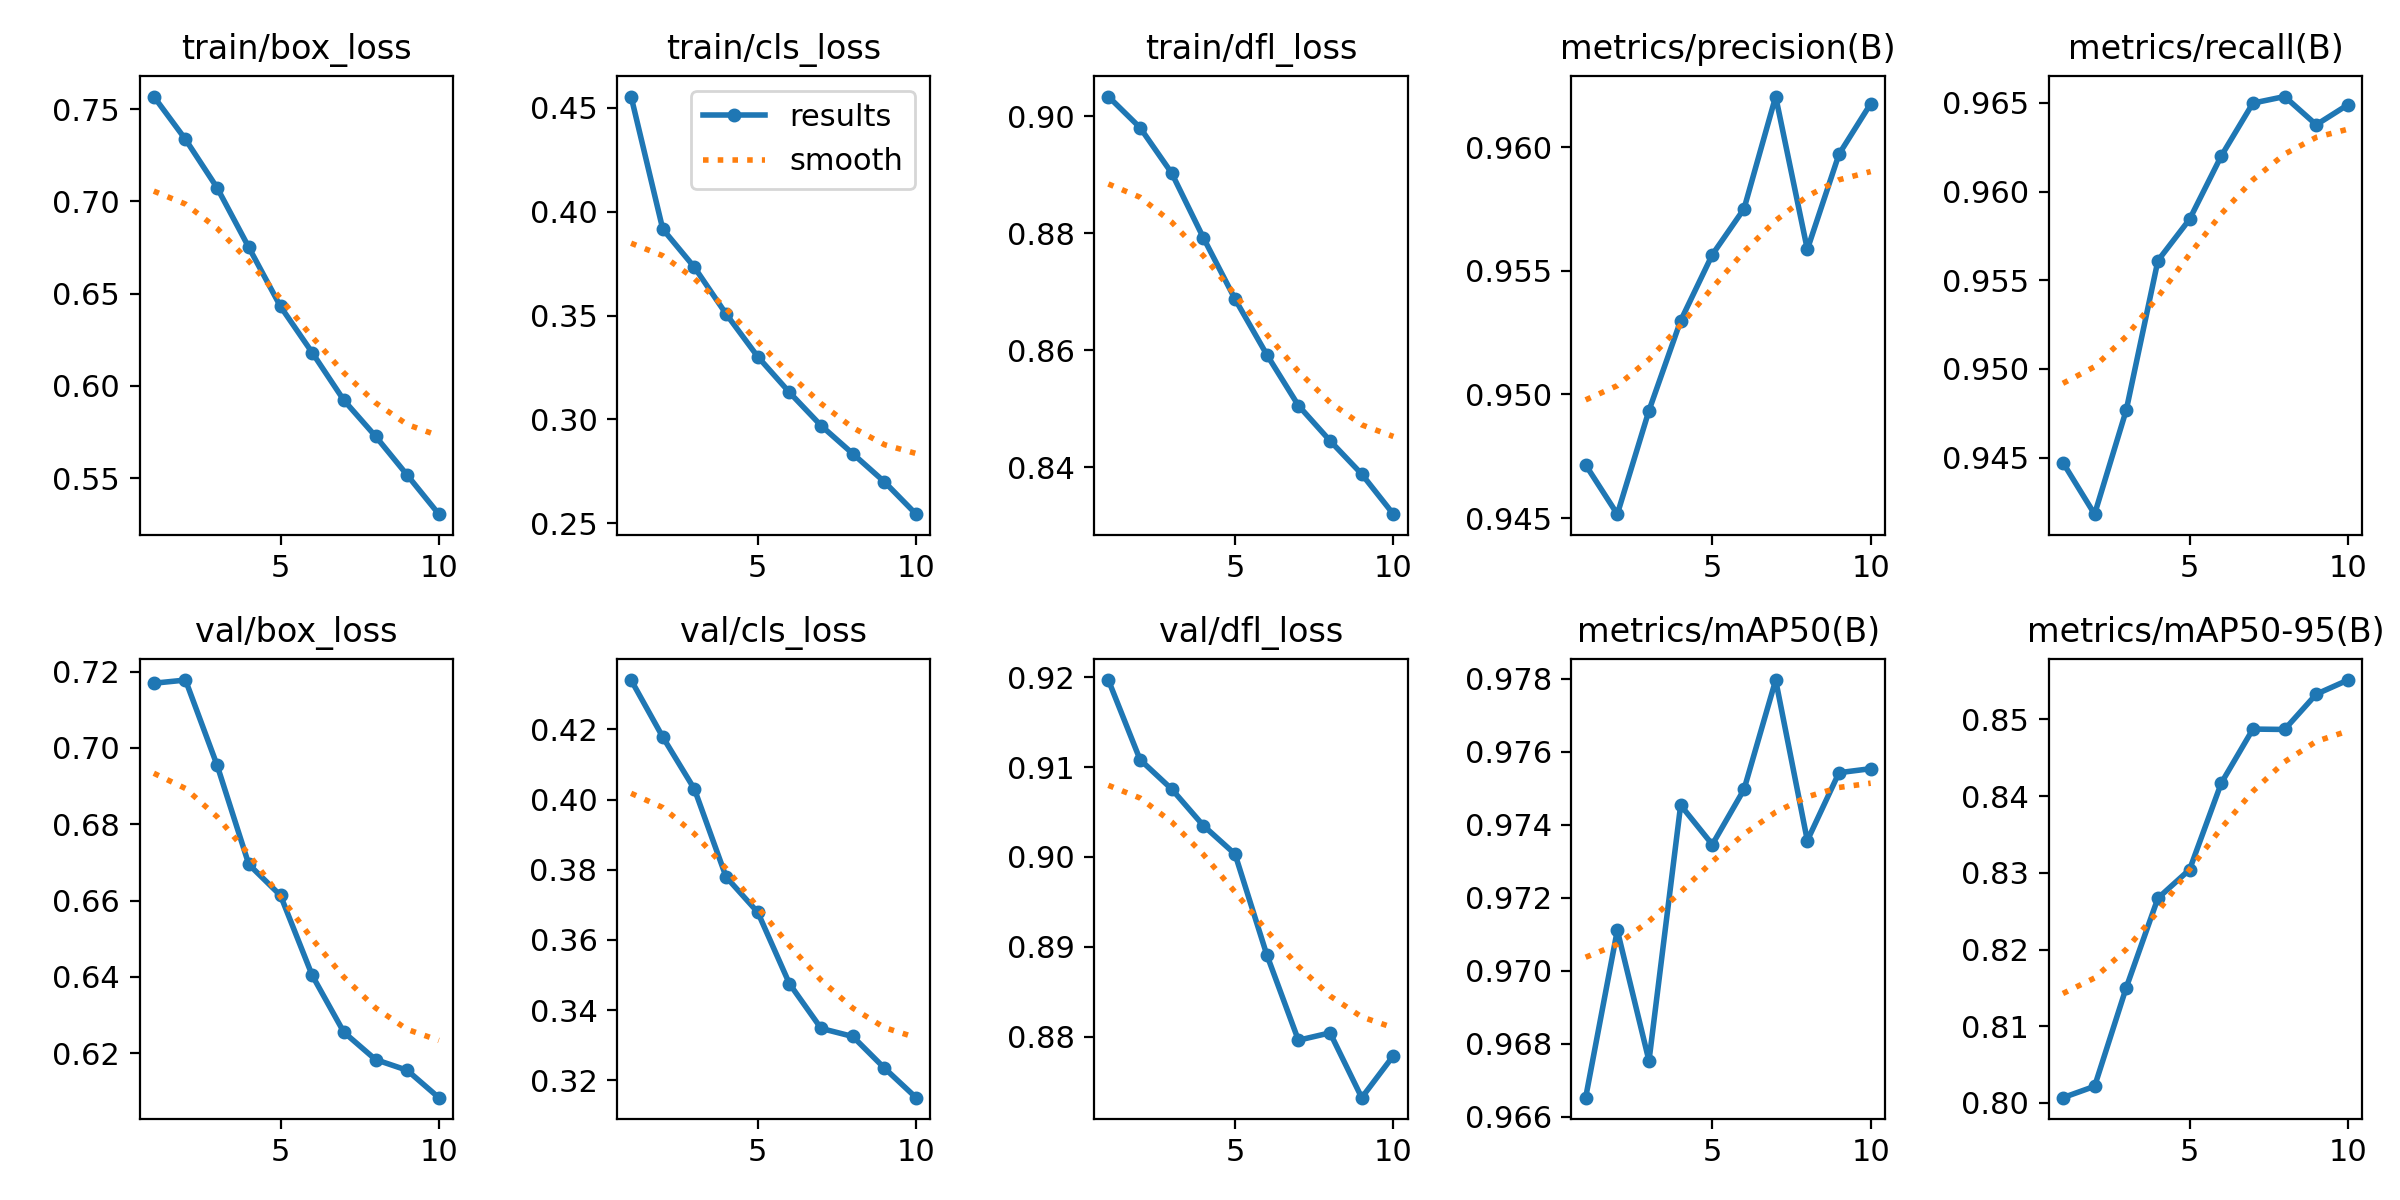

In [5]:
IPython.display.Image(RUN_DIR / "results.png")

PR-кривая лучшей модели:

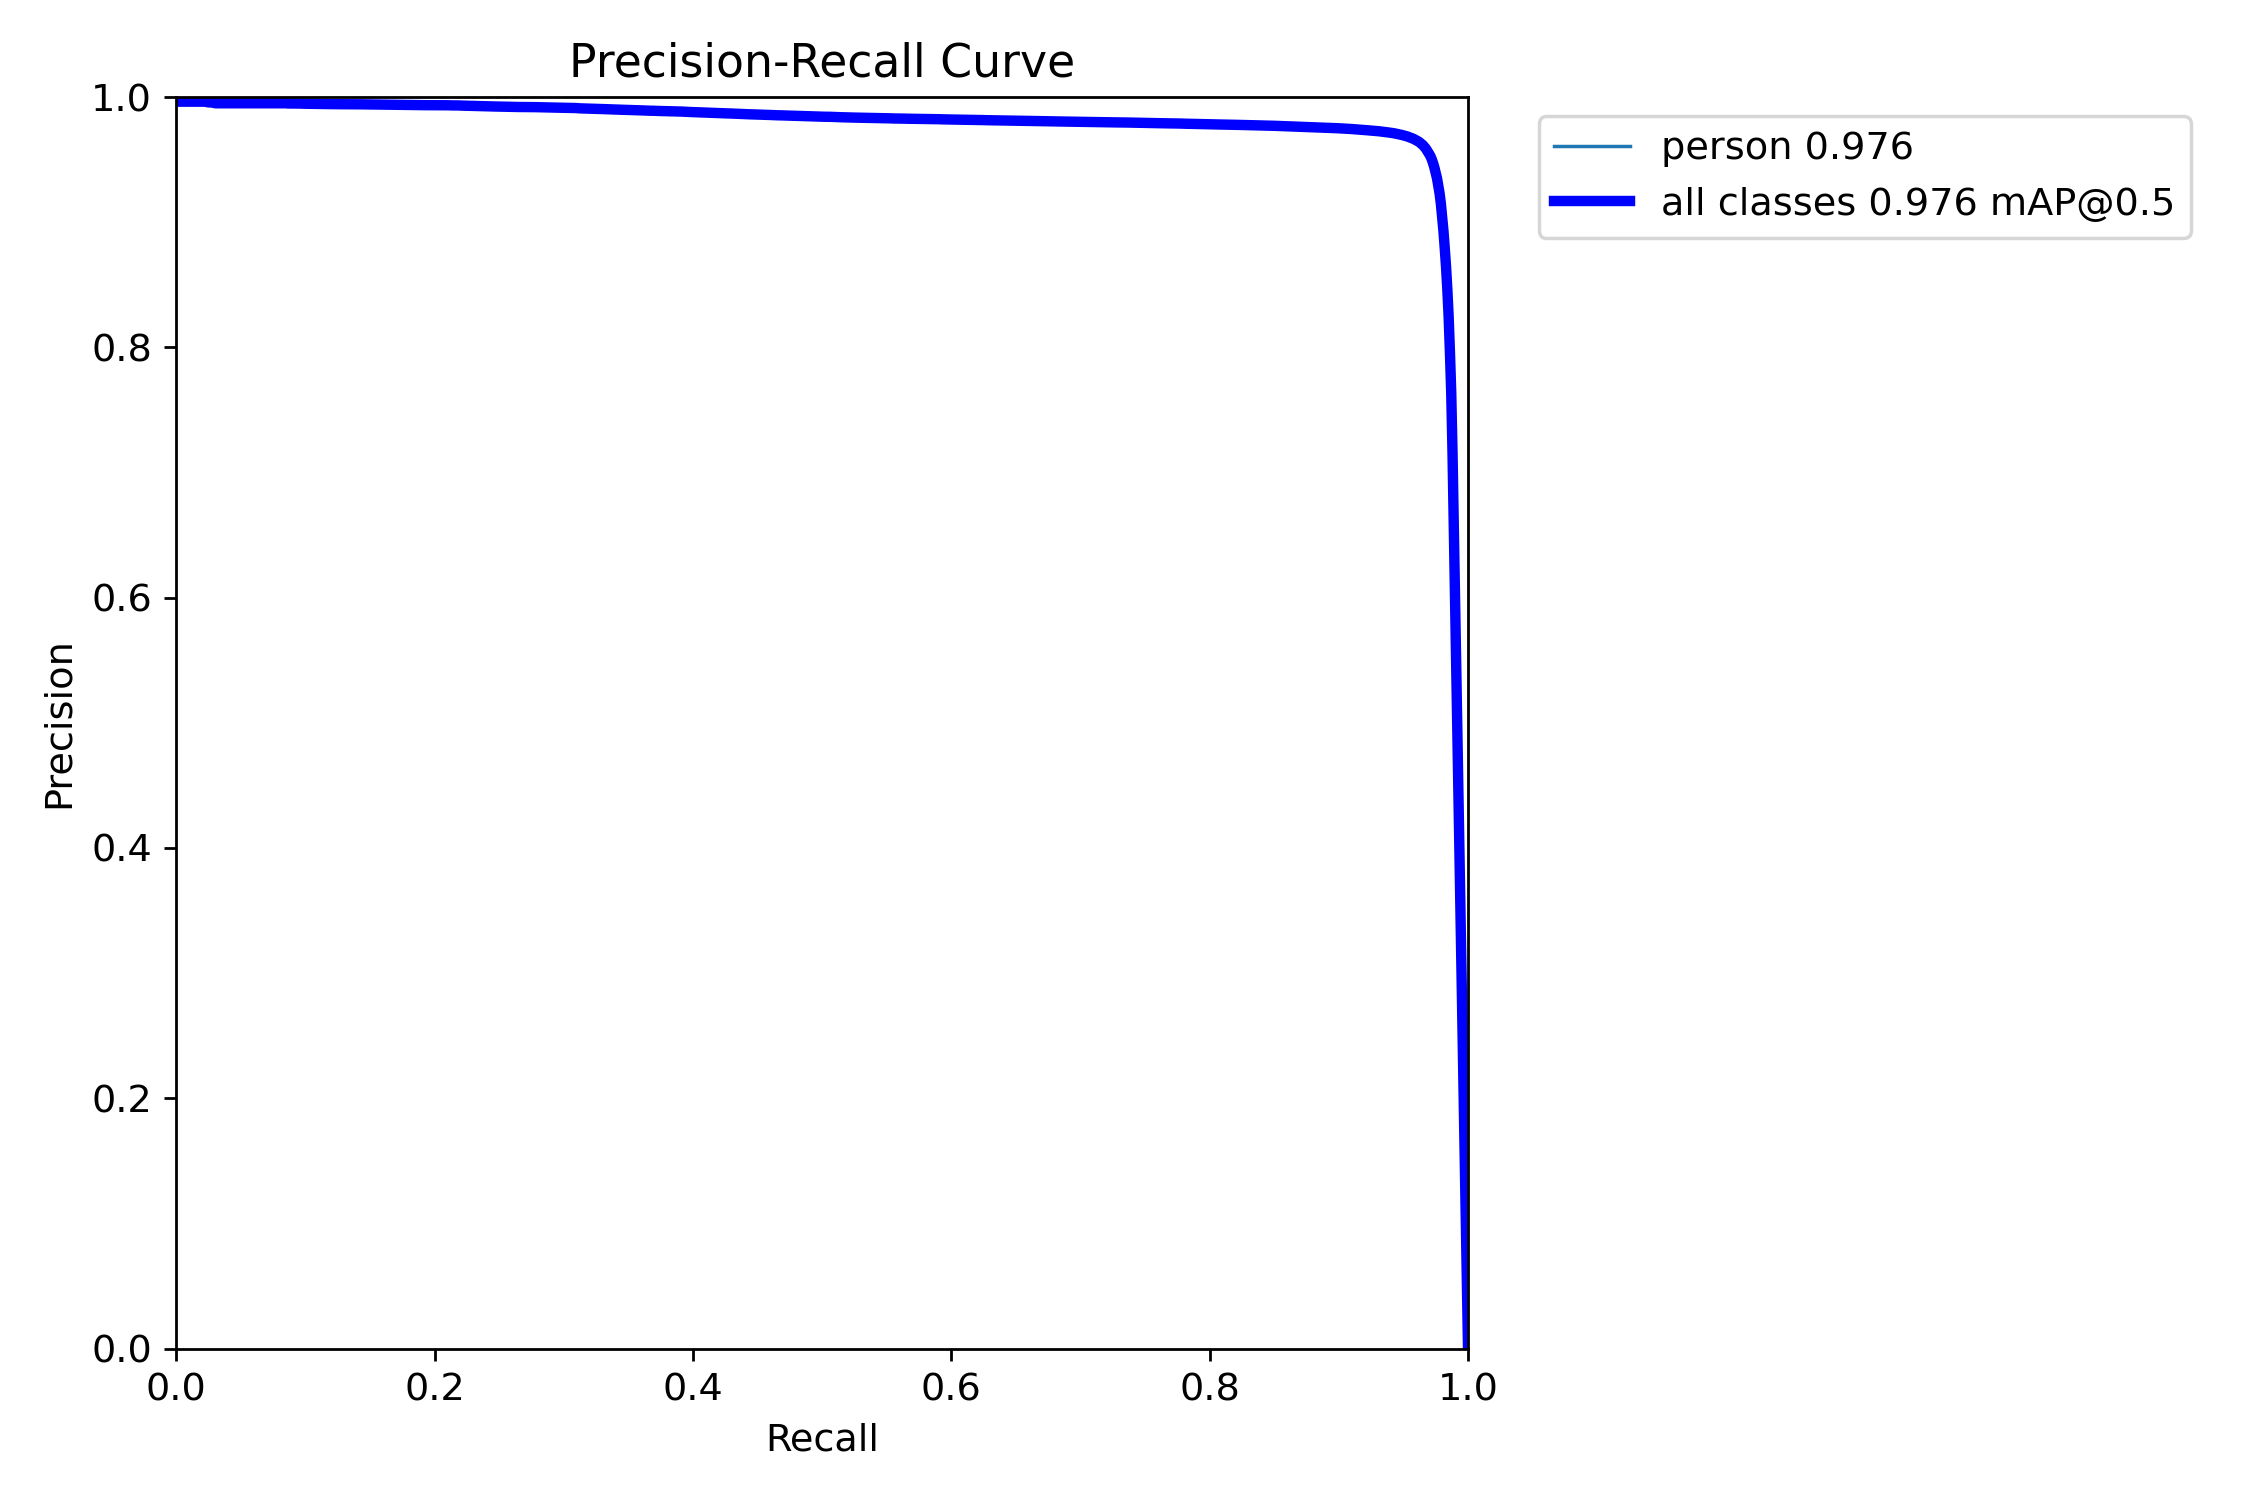

In [6]:
IPython.display.Image(RUN_DIR / "PR_curve.png")

## Пример инференса


image 1/1 /kaggle/working/../input/sportsmot/images/val/v_00HRwkvvjtQ_c001/img1/000001.jpg: 384x640 7 persons, 58.2ms
Speed: 1.7ms preprocess, 58.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


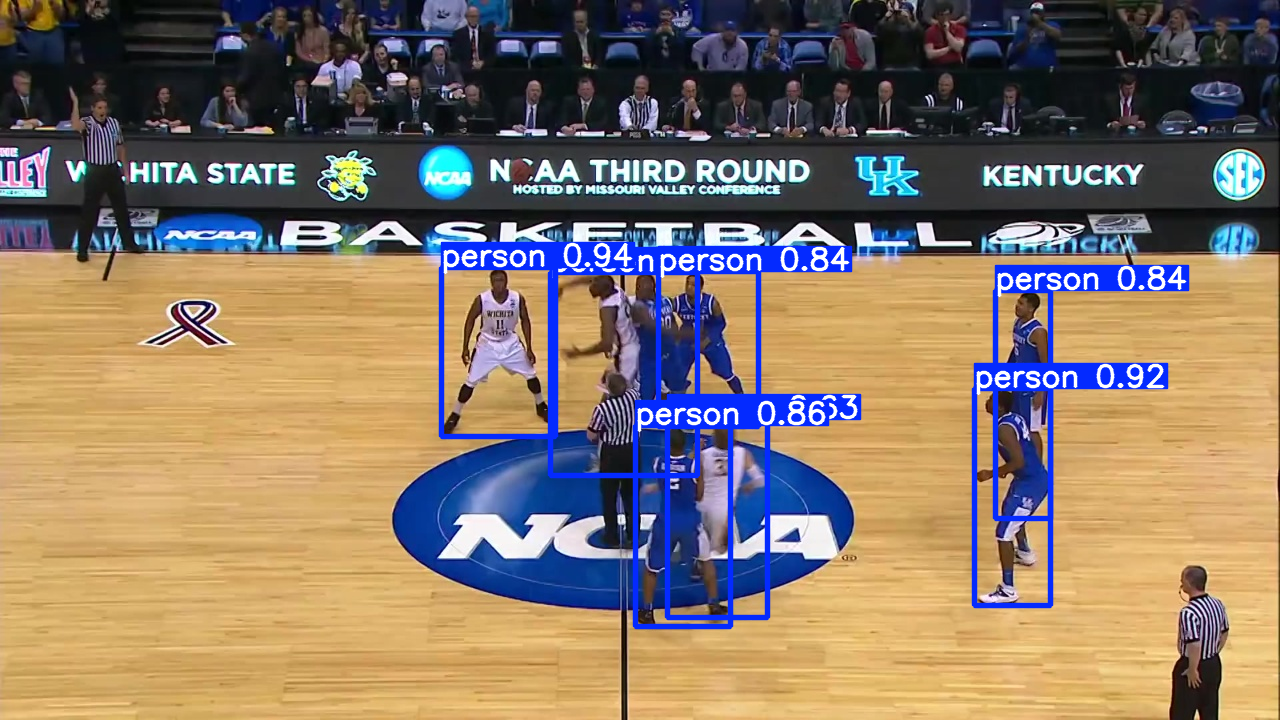

In [7]:
model = MODEL_CLASS(RUN_DIR / "weights/best.pt")
model(DATA_DIR / "images/val/v_00HRwkvvjtQ_c001/img1/000001.jpg")[0].show()